In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import copy
import numpy as np
import tensorflow as tf


from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from tensorflow.keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D

#from keras_vggface.vggface import VGGFace
#from keras_vggface import utils
from tensorflow.keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd
import cv2
import scipy.misc
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:

base_path = 'C:/Users/Bich Ninh/GR3/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 64
train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
valid_flow = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [3]:
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
"""
    Propsoed CNN architecture.
    
"""

model = Sequential()

# Pamameters Initialization
input_shape = (224,224,3)
activation = 'relu'
padding = 'same'
droprate = 0.1
epsilon=0.001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))


model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=512, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))

model.summary() # Summary of the architecture

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                      

In [4]:
#Parameters Initialization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model.compile(loss='binary_crossentropy',optimizer=Adam(0.0001), metrics=['accuracy'])

callback = [
    EarlyStopping(
        monitor='val_loss',
        patience=7,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='CustomModel.hdf5',
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        verbose=1
    )
]
train_steps = 40000//batch_size
valid_steps = 5000//batch_size
history = model.fit(
    train_flow,
    epochs=50,
    steps_per_epoch=train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps,
    verbose=1,
    callbacks=callback
)
with open("./result_model.txt",'w') as f:
    for k in history.history.keys():
        print(k,file=f)
        for i in history.history[k]:
            print(i,file=f)

Epoch 1/50
625/625 [==============================] - ETA: 0s - loss: 0.5644 - accuracy: 0.7059
Epoch 00001: val_loss improved from inf to 0.58167, saving model to CustomModel.hdf5
625/625 [==============================] - 2276s 4s/step - loss: 0.5644 - accuracy: 0.7059 - val_loss: 0.5817 - val_accuracy: 0.6925
Epoch 2/50
625/625 [==============================] - ETA: 0s - loss: 0.4511 - accuracy: 0.7878
Epoch 00002: val_loss did not improve from 0.58167
625/625 [==============================] - 2232s 4s/step - loss: 0.4511 - accuracy: 0.7878 - val_loss: 0.7561 - val_accuracy: 0.6605
Epoch 3/50
625/625 [==============================] - ETA: 0s - loss: 0.3832 - accuracy: 0.8280
Epoch 00003: val_loss improved from 0.58167 to 0.49955, saving model to CustomModel.hdf5
625/625 [==============================] - 2305s 4s/step - loss: 0.3832 - accuracy: 0.8280 - val_loss: 0.4996 - val_accuracy: 0.7614
Epoch 4/50
625/625 [==============================] - ETA: 0s - loss: 0.3319 - accuracy:

Epoch 29/50
625/625 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9845
Epoch 00029: val_loss did not improve from 0.05820
625/625 [==============================] - 1940s 3s/step - loss: 0.0414 - accuracy: 0.9845 - val_loss: 0.1157 - val_accuracy: 0.9605
Epoch 30/50
625/625 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9855
Epoch 00030: val_loss did not improve from 0.05820
625/625 [==============================] - 1928s 3s/step - loss: 0.0389 - accuracy: 0.9855 - val_loss: 0.0875 - val_accuracy: 0.9683
Epoch 31/50
625/625 [==============================] - ETA: 0s - loss: 0.0369 - accuracy: 0.9870
Epoch 00031: val_loss did not improve from 0.05820
625/625 [==============================] - 1959s 3s/step - loss: 0.0369 - accuracy: 0.9870 - val_loss: 0.1240 - val_accuracy: 0.9521
Epoch 32/50
625/625 [==============================] - ETA: 0s - loss: 0.0350 - accuracy: 0.9877
Epoch 00032: val_loss did not improve from 0.05820
625/625 [

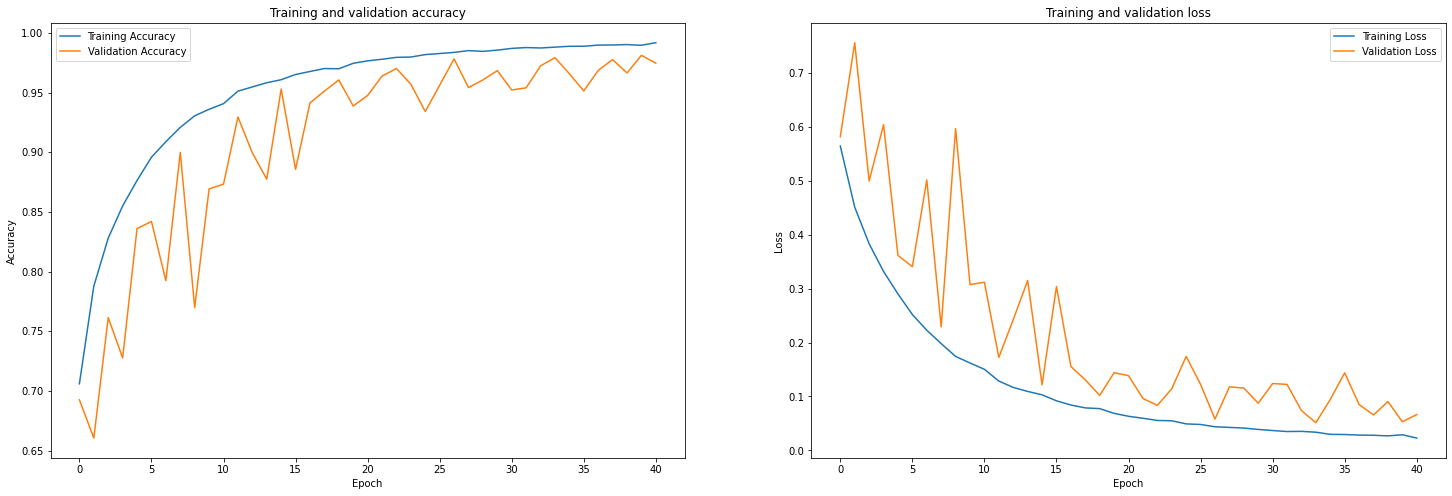

In [5]:
plt.figure(figsize=(25, 8))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [6]:
"""
Plot the training and validation loss
epochs - list of epoch numbers
loss - training loss for each epoch
val_loss - validation loss for each epoch
"""
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
"""
Plot the training and validation accuracy
epochs - list of epoch numbers
acc - training accuracy for each epoch
val_acc - validation accuracy for each epoch
"""
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

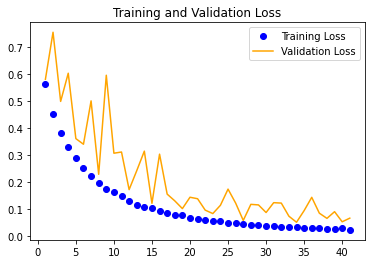

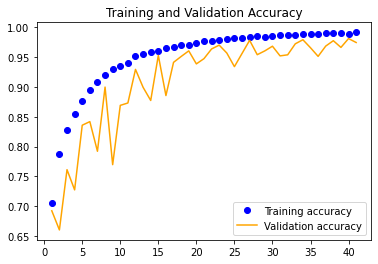

In [8]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [9]:
with open("C:/Users/Bich Ninh/GR3/result_model.txt",'w') as f:
    for k in history.history.keys():
        print(k,file=f)
        for i in history.history[k]:
            print(i,file=f)

In [11]:
import json
with open('C:/Users/Bich Ninh/GR3/file.json', 'w') as f:
    json.dump(history.history, f)

In [12]:
metrics = ['accuracy', 'val_accuracy', 'loss', 'val_loss']
index_model_checkpoint = np.argmin(history.history['val_loss'])
[f'Best {metric}: {history.history[metric][index_model_checkpoint]:.2f}' for metric in metrics]

['Best accuracy: 0.99',
 'Best val_accuracy: 0.98',
 'Best loss: 0.03',
 'Best val_loss: 0.05']

In [15]:
def load_and_test_model(model_name, test_set, display_model_summary=False):
    try:
        loaded_model = tf.keras.models.load_model(f'{model_name}.hdf5')
    except OSError:
        print('The model called does not exist. Testing for the last saved model.')
        loaded_model = tf.keras.models.load_model('CustomModel.hdf5')
    if display_model_summary:
        loaded_model.summary()
    test_loss, test_acc = loaded_model.evaluate(test_set)
    print(f'Test loss: {round(test_loss, 2)}, Test accuracy: {round(test_acc * 100, 2)}')

In [16]:
load_and_test_model('CNN_Custom_Model', test_flow)

The model called does not exist. Testing for the last saved model.
20000/20000 [==============================] - 358s 18ms/step - loss: 0.0522 - accuracy: 0.9816
Test loss: 0.05, Test accuracy: 98.16


In [17]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

In [18]:
from sklearn import metrics
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))

ROC AUC Score: 0.9986768500000002
AP Score: 0.9985958347255417

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10000
           1       0.99      0.97      0.98     10000

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall, FalseNegatives, FalsePositives, TrueNegatives, TruePositives, AUC
from tensorflow.math import confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd
import cv2
import scipy.misc
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

def calculate_model_performance_metrics(model_name, test_dataset, transfer_ml=False, model_version=0,
                                        show_plots=False):
    
    try:
        loaded_model = tf.keras.models.load_model(f'{model_name}.hdf5')
        print(f'Calculating performance metrics for model {model_name}')
    except OSError:
        print('The model called does not exist. Testing for the last saved model.')
        loaded_model = tf.keras.models.load_model('CustomModel.hdf5')

    if transfer_ml and model_version != 0:
        test_images, true_labels = test_dataset.as_numpy_iterator().next()
        test_images = utils.preprocess_input(test_images, version=model_version)
        predictions_sigmoid = loaded_model.predict(test_images, verbose=1)
    else:
        true_labels = test_dataset.labels
        predictions_sigmoid = loaded_model.predict(test_dataset, verbose=1)
    
    false_positives_negatives = []
    lower_bound_threshold = 0.2
    upper_bound_threshold = 0.7
    step = 0.001

    sigmoid_threshold = np.arange(lower_bound_threshold, upper_bound_threshold, step)

    for threshold in sigmoid_threshold:
        predictions_binary = tf.where(predictions_sigmoid > threshold, 1, 0)
        conf_matrix = confusion_matrix(true_labels, predictions_binary)
        false_positives_negatives.append(conf_matrix[0][1] + conf_matrix[1][0])

    min_threshold = sigmoid_threshold[np.argmin(false_positives_negatives)]
    print(f'Minimizer of false positives and false negatives: {min_threshold:.3f}')

    metrics_options = {
        'Precision': Precision,
        'Recall': Recall,
        'True Positives': TruePositives,
        'True Negatives': TrueNegatives,
        'False Positives': FalsePositives,
        'False Negatives': FalseNegatives
    }

    def disp_metrics(metric, threshold_value=min_threshold, verbose=False):
        metrics = metrics_options[metric](thresholds=threshold_value)
        metrics.update_state(true_labels, predictions_sigmoid)
        result = metrics.result().numpy()
        if verbose:
            print(f'{metric}: {result:.3f}')
        return result

    bin_acc = BinaryAccuracy(threshold=min_threshold)
    bin_acc.update_state(true_labels, predictions_sigmoid)
    print(f'Binary Accuracy: {bin_acc.result().numpy():.3f}')

    for metric in metrics_options.keys():
        disp_metrics(metric, verbose=True)

    rights = disp_metrics('True Positives') + disp_metrics('True Negatives')
    wrongs = disp_metrics('False Positives') + disp_metrics('False Negatives')
    print(f'Number of right guesses: {rights:.3f}')
    print(f'Number of wrong guesses: {wrongs:.3f}')

    auc = AUC()
    auc.update_state(true_labels, predictions_sigmoid)
    auc = auc.result().numpy()
    print(f'Area under curve ROC: {auc:.3f}')

    precision = disp_metrics('Precision')
    recall = disp_metrics('Recall')

    f1_score = 2 * (precision * recall) / (precision + recall)
    print(f'F1-Score: {f1_score:.3f}')


    if show_plots:
        
        plt.figure(figsize=(18, 14))
    
        plt.subplot(2, 2, 1)
        plt.plot(sigmoid_threshold, false_positives_negatives, linewidth=3)
        plt.title('Sum of false positives and false negatives as a function of sigmoid threshold')
        plt.xlabel('Sigmoid threshold')
        plt.ylabel('False positives + False negatives')

        plt.subplot(2, 2, 2)
        cm = confusion_matrix(true_labels, tf.where(predictions_sigmoid > min_threshold, 1, 0))
        sns.heatmap(cm, annot=True, fmt="d")
        plt.title(f'Confusion matrix @{min_threshold:.3f}')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')

        plt.subplot(2, 2, 3)
        false_positive_rate, true_positive_rate, _ = roc_curve(true_labels, predictions_sigmoid)
        plt.plot(false_positive_rate, true_positive_rate, linewidth=4)
        plt.title(f'Receiver Operating Characteristic curve for AUC: {auc:.3f}')
        plt.xlabel('False positive rate')
        plt.ylabel('True positives rate')
        plt.grid(True)

        plt.subplot(2, 2, 4)
        prec, rec, _ = precision_recall_curve(true_labels, predictions_sigmoid)
        plt.plot(rec, prec, linewidth=4)
        avg_precision_score = average_precision_score(true_labels, predictions_sigmoid)
        plt.title(f'Precision-Recall curve | Average precision score: {avg_precision_score:.3f}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.grid(True)
    
    return min_threshold

The model called does not exist. Testing for the last saved model.
20000/20000 [==============================] - 404s 20ms/step
Minimizer of false positives and false negatives: 0.216
Binary Accuracy: 0.985
Precision: 0.984
Recall: 0.986
True Positives: 9861.000
True Negatives: 9838.000
False Positives: 162.000
False Negatives: 139.000
Number of right guesses: 19699.000
Number of wrong guesses: 301.000
Area under curve ROC: 0.998
F1-Score: 0.985


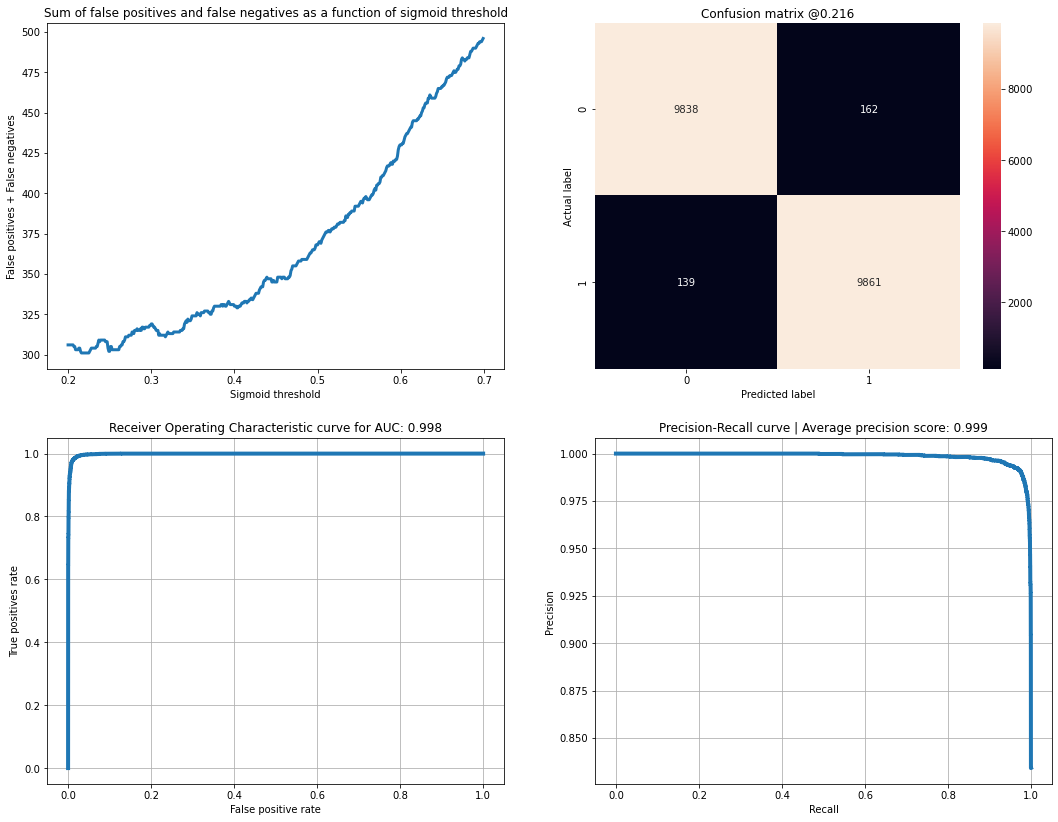

In [22]:
min_threshold = calculate_model_performance_metrics('CNN_Custom_Model', test_flow, show_plots=True)

Found 20000 images belonging to 2 classes.


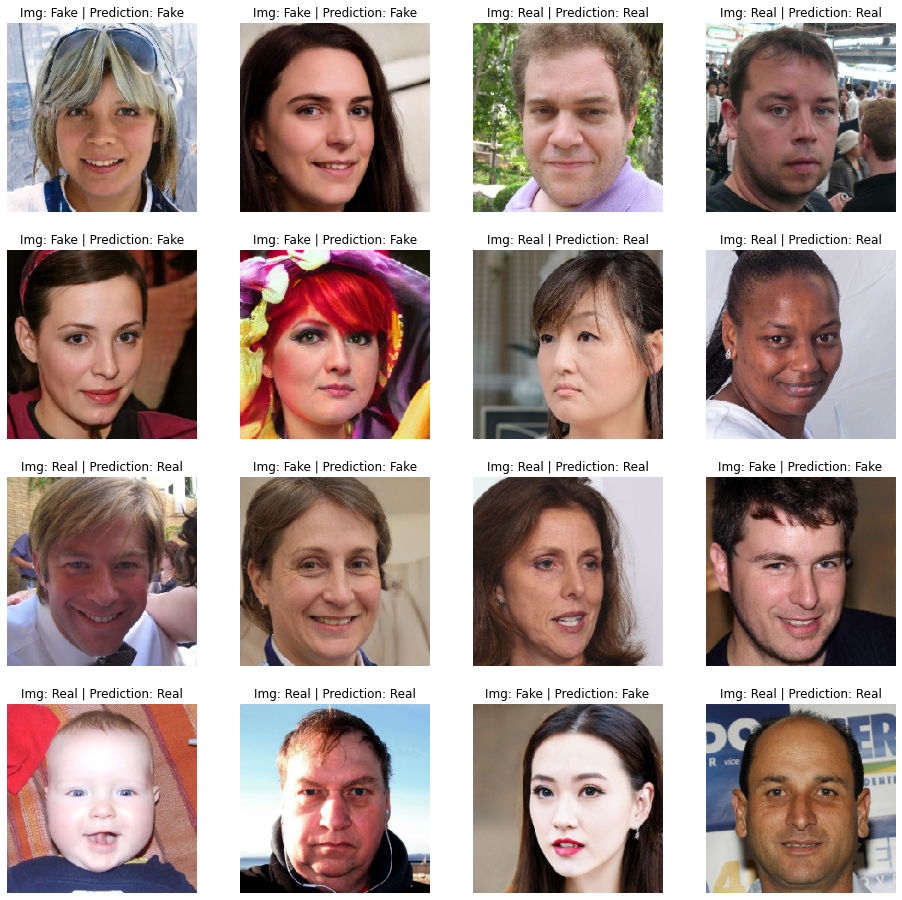

In [26]:
labels = {1.0: 'Real', 0.0: 'Fake'}
base_path = 'C:/Users/Bich Ninh/GR3/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.)
test_flow = image_gen.flow_from_directory(base_path +'test/', target_size=(224, 224), class_mode='binary')
loaded_model = tf.keras.models.load_model('CustomModel.hdf5')

for images, images_labels in test_flow:
    plt.figure(figsize=(16, 16))
    predictions = tf.where(loaded_model.predict(images) > min_threshold, 1, 0)
    predictions = tf.reshape(predictions, [-1]).numpy()

    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.title(f'Img: {labels[images_labels[i]]} | Prediction: {labels[predictions[i]]}')
        plt.imshow(np.uint8(255 * images[i]))
        plt.axis('off')
    break

In [27]:
#Load Required Packages
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Helper Functions
def extract_layer_output(model, layer_name, data):
    int_layer_op = model.get_layer(name=layer_name).output
    int_layer_model = Model(inputs=model.input, outputs=int_layer_op)
    int_layer_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return int_layer_model.predict(data)
def generate_df(arr, label):
    df = pd.DataFrame(arr)
    df['label'] = label
    return df

In [29]:
base_path = 'C:/Users/Bich Ninh/GR3/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.)

train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=64,
    shuffle=False,
    class_mode='binary'
)

CustomModel = tf.keras.models.load_model('CustomModel.hdf5')
int_output_custom = extract_layer_output(CustomModel, 'global_average_pooling2d', train_flow)
int_output_custom.shape

Found 100000 images belonging to 2 classes.


(100000, 512)

In [30]:
int_output_custom = generate_df(int_output_custom, train_flow.classes)
int_output_custom.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,label
0,-0.357438,-0.448468,-0.101081,0.495867,0.167222,-0.034065,-0.305684,-0.188458,-0.364608,-0.540193,...,-0.020115,-0.516917,0.611039,-0.155363,0.498786,0.456990,-0.235425,-0.368741,0.939089,0
1,-0.008610,0.148884,-0.050872,0.531545,0.039901,-0.245508,-0.261587,0.396187,-0.570967,-0.535905,...,-0.354491,0.682568,0.531190,0.025653,0.447224,0.230676,-0.109376,-0.795643,0.039376,0
2,-0.039868,0.244407,-0.019520,0.210674,0.183093,0.408217,-0.044074,0.552701,0.323131,-0.237751,...,0.659966,0.875871,-0.024688,0.603540,0.163655,1.198802,0.432057,0.304558,0.056805,0
3,-0.433117,-0.066006,-0.325115,0.435155,0.252487,0.191419,0.430567,-0.149492,-0.112754,-0.396182,...,-0.463209,-0.247420,-0.466456,-0.071839,0.206697,0.251686,-0.036555,-0.194164,-0.220807,0
4,-0.176961,-0.079696,-0.610020,0.457499,-0.561714,0.630798,0.160866,0.258479,0.106351,-0.344408,...,0.378652,2.067103,0.076039,1.647753,0.909084,0.579657,0.404561,-0.072899,0.275759,0


In [31]:
int_output_custom.tail()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,label
99995,0.370776,0.029566,0.398911,0.017849,-0.266369,-0.623325,0.166874,0.372879,0.393888,-0.038688,...,0.370664,0.049579,-0.672900,-0.311678,-0.305421,-0.660907,-0.640506,0.487669,-0.591377,1
99996,0.315106,-0.416907,0.214909,-0.525953,-0.497573,-0.250244,0.024132,-0.929719,-0.081414,-0.312909,...,-0.270571,-0.798851,-0.306652,-0.588122,-0.346141,-0.080058,-0.132704,-0.158443,0.227990,1
99997,-0.138252,0.053204,-0.148888,-0.507999,0.231768,-0.182408,0.101470,0.273976,0.052684,0.215635,...,0.106548,-0.247105,-0.141229,0.095675,-0.261447,-0.700405,-0.771037,0.213020,-0.520343,1
99998,0.182791,0.065574,-0.334254,-0.062207,0.160616,-0.556018,-0.297919,-0.133810,-0.167121,0.221432,...,-0.585158,-0.179237,0.205322,-0.233922,-0.274299,-0.223948,-0.668986,-0.176710,0.007055,1
99999,-0.138244,0.318741,-0.416209,0.189370,0.076964,0.179985,-0.131324,-0.221101,0.041922,-0.119311,...,0.245803,0.687524,-0.259821,0.385321,-0.539957,-0.061273,-0.454072,-0.305968,-0.076017,1


In [32]:
int_output_custom.to_csv('C:/Users/Bich Ninh/GR3/CustomModel_rep.csv', index=False)

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
def pca_n_svm(x,y, n_pca = 50, kernel = 'poly', PC1 = 0, PC2 = 1):
    
    # standardize data
    x = StandardScaler().fit_transform(x)
    
    # PCA
    pca = PCA(n_components = n_pca)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)
    PCA_df = pd.concat([principalDf, y], axis = 1)
    
    pca_x = PCA_df.drop('label', axis = 1).values
    pca_y = PCA_df['label'].values
    X_train, X_test, y_train, y_test = train_test_split(pca_x, pca_y, test_size=0.3,random_state=109) # 70% training and 30% test
    
    #Create a svm Classifier
    clf = svm.SVC(kernel=kernel) # Polynomial Kernel
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    
    
    PCA_df["label"].replace({0: "Fake", 1: 'Real'}, inplace=True)
    # Scatter plot of PC0 and PC1
    sns.scatterplot(x=PC1, y=PC2, data=PCA_df,  hue="label")
    #plt.title('PC0 vs PC1')
    # Set x-axis label
    plt.xlabel('PC' + str(PC1))
    # Set y-axis label
    plt.ylabel('PC' + str(PC2))

In [34]:
# get last layer vector
vector_dense = pd.read_csv('CustomModel_rep.csv')
# shuffle
vector_dense = vector_dense.sample(frac=1).reset_index(drop=True)

In [35]:
x = vector_dense.drop('label', axis = 1).values
y = vector_dense['label']

Accuracy: 0.9996333333333334
Precision: 0.999664113932554
Recall: 0.9995969637939142


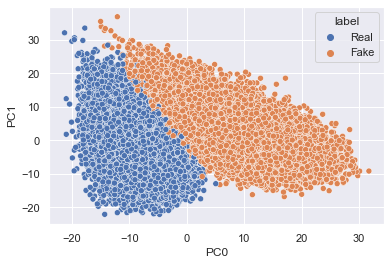

In [36]:
pca_n_svm(x,y)